In [21]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

# UN Database

In [2]:
# Tourism
inbounds = pd.read_excel('data/processed/un_inbounds_total.xlsx').drop('Unnamed: 0', axis =1)
purpose = pd.read_excel('data/processed/un_inbounds_purpose_of_trip.xlsx').drop('Unnamed: 0', axis =1)
region = pd.read_excel('data/processed/un_arrivals_by_region.xlsx').drop('Unnamed: 0', axis =1)
acc = pd.read_excel('data/processed/accomodation_variables.xlsx').drop('Unnamed: 0', axis =1)

In [ ]:
def grafico_top10(df):
    top10 = df.query('year == 2022').sort_values(by = 'inbounds_tourists', ascending = False).head(10)

    fig = px.bar(x = top10['country'], y = top10['inbounds_tourists'], barmode = 'stack', color_discrete_sequence=['skyblue'])
    fig.update_layout(yaxis_title='Inbounds', xaxis_title='Country', height = 400)
    return fig

In [3]:
inbounds.groupby(['year'])[['inbounds_tourists']].sum().plot.line(backend = 'plotly')

In [4]:
fig = px.line(inbounds.groupby(['year'])[['inbounds_tourists']].sum(), 
              y='inbounds_tourists')

fig.update_traces(line=dict(color='red'))

fig.update_layout(
    plot_bgcolor='rgba(200,1,1,0)'
)

fig.show()

In [ ]:
fig = px.bar(x = grafico['year'], y = grafico['inbounds_total'], barmode = 'stack', color_discrete_sequence=['royalblue'])
fig.update_layout(yaxis_title='Global Inbounds')
fig.show()

In [5]:
# regions.groupby('region').plot()

grafico = region.groupby(['year', 'region']).sum().reset_index()
# grafico.plot.bar(x = 'year', y = 'inbounds_total', color = 'region', barmode = 'stack', text_auto = '.2s', backend = 'plotly')
grafico.plot.bar(x = 'year', y = 'region', backend = 'plotly')

In [6]:
grafico = pd.DataFrame(inbounds.groupby('year')['inbounds_total'].sum()).reset_index()
grafico2 = inbounds.query('country == "SPAIN"')[['year', 'inbounds_total']].rename(columns = {'inbounds_total': 'inbounds_spain'})
grafico = pd.merge(grafico, grafico2, on = 'year')
grafico['%_spain'] = grafico['inbounds_spain'] / grafico['inbounds_total']
grafico['color'] = 'red'

In [8]:
fig = px.bar(x = grafico['year'], y = grafico['inbounds_spain'], barmode = 'stack', color_discrete_sequence=['tomato'])
fig.update_layout(yaxis_title='Inbounds Spain')
fig.show()

In [9]:
fig = px.bar(x = grafico['year'], y = grafico['%_spain'], barmode = 'stack', color_discrete_sequence=['indianred'])
fig.update_layout(yaxis_title='% over global inbounds', height = 600, width = 1000)
fig.show()

In [10]:
top10 = inbounds.query('year == 2022').sort_values(by = 'inbounds_total', ascending = False).head(10)

fig = px.bar(x = top10['country'], y = top10['inbounds_total'], barmode = 'stack', color_discrete_sequence=['skyblue'])
fig.update_layout(yaxis_title='Inbounds', xaxis_title='Country', height = 600, width = 1000)
fig.show()

In [12]:
grafico = inbounds.groupby(['year', 'region'])[['inbounds_total']].sum().reset_index()
# grafico.plot.bar(x = 'year', y = 'inbounds_total', color = 'region', barmode = 'stack', text_auto = '.2s', backend = 'plotly')
grafico.plot.bar(x = 'year', y = 'inbounds_total', color = 'region', barmode = 'stack', backend = 'plotly')

In [13]:
grafico = purpose.groupby(['year'])[['business_tourists', 'personal_tourists']].sum().reset_index()

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Business Tourists', x=grafico['year'], y=grafico['business_tourists'], text=grafico['business_tourists'], texttemplate='%{text:.2s}'),
    go.Bar(name='Personal Tourists', x=grafico['year'], y=grafico['personal_tourists'], text=grafico['personal_tourists'], texttemplate='%{text:.2s}')
])

# Update layout to stack bars
fig.update_layout(barmode='stack')

# Show the plot
fig.show()

In [14]:
top10 = acc.query('year == 2022').sort_values(by = 'avg_length_stay', ascending = False).head(20)

fig = px.bar(x = top10['country'], y = top10['avg_length_stay'], barmode = 'stack', color_discrete_sequence=['orchid'])
fig.update_layout(yaxis_title='Inbounds', xaxis_title='Country', height = 600, width = 1000)
fig.show()

In [15]:
top10 = acc.query('year == 2022').sort_values(by = 'rooms_occupancy_rate', ascending = False).head(20)

fig = px.bar(x = top10['country'], y = top10['rooms_occupancy_rate'], barmode = 'stack', color_discrete_sequence=['lightcoral'])
fig.update_layout(yaxis_title='Inbounds', xaxis_title='Country', height = 600, width = 1000)
fig.show()

# Age

In [113]:
df_age = pd.read_excel('data/processed/age_variable.xlsx').drop('Unnamed: 0', axis = 1)

In [114]:
df_age.country.nunique()

244

In [115]:
graph = df_age.query('year == 2023').sort_values(by = 'senior_%', ascending=False).head(20)

fig = px.bar(x = graph['country'], y = graph['senior_%'], barmode = 'stack', color_discrete_sequence=['forestgreen'])
fig.update_layout(yaxis_title='% senior citizens', height = 600, width = 1000)
fig.show()

In [118]:
graph = df_age.query('country == "Spain"')

fig = px.bar(x = graph['year'], y = graph['senior_%'], barmode = 'stack', color_discrete_sequence=['forestgreen'])
fig.update_layout(yaxis_title='% senior citizens', height = 600, width = 1000)
fig.show()

# Safety Variables

In [16]:
gpi = pd.read_excel('data/raw/safety vars/global_peace_index.xlsx').drop('Unnamed: 0', axis = 1)
gti = pd.read_excel('data/raw/safety vars/global_terrorism_index.xlsx').drop('Unnamed: 0', axis = 1)
safety = pd.read_excel('data/processed/safety_variables.xlsx').drop('Unnamed: 0', axis = 1)

In [17]:
top10 = gpi.query('year == 2023').query('peace_index > 0').sort_values(by = 'peace_index').head(20)

fig = px.bar(x = top10['name'], y = top10['peace_index'], barmode = 'stack', color_discrete_sequence=['lightblue'])
fig.update_layout(yaxis_title='Peace Index 2023', xaxis_title='Country')
fig.show()

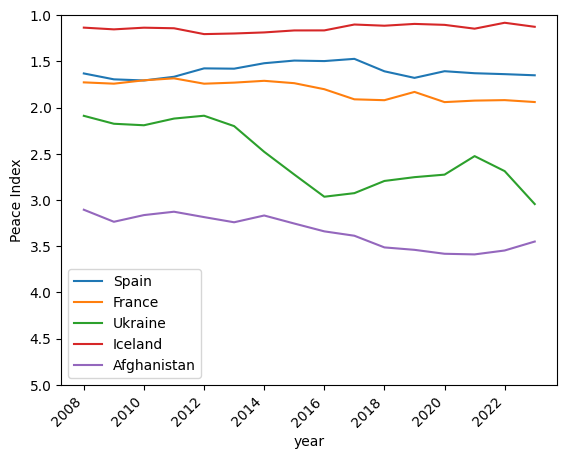

In [22]:
countries = ['Spain', 'France', 'Ukraine', 'Iceland', 'Afghanistan']
for country in countries:
    sns.lineplot(data = safety.query(f'country == "{country}"'), x = 'year', y = 'peace_index', label = country)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Peace Index')
plt.legend()
plt.ylim(5, 1)
plt.show()

# Visa Index

In [28]:
visa = pd.read_excel('data/processed/visa_variable.xlsx')

In [30]:
visa

,Country,Tourism Openness Index
0,Afghanistan,0.00
1,Albania,71.64
2,Algeria,1.47
3,Andorra,23.66
4,Angola,51.00
...,...,...
211,Venezuela,25.22
212,Viet Nam,42.46
213,Yemen,2.46
214,Zambia,72.61


In [32]:
visa['Tourism Openness Index'].mean()

41.106574074074075

In [33]:
visa.sort_values(by = 'Tourism Openness Index', ascending = False)

,Country,Tourism Openness Index
126,Micronesia,100.00
46,Cook Islands,100.00
144,Niue,100.00
56,Dominica,99.82
82,Haiti,95.87
...,...,...
109,Libya,0.13
200,Turkmenistan,0.00
100,"Korea, Democratic People's Republic of",0.00
90,Iraq,0.00


In [37]:
graph = visa.sort_values(by = 'Tourism Openness Index', ascending = False).head(20)

fig = px.bar(x = graph['Country'], y = graph['Tourism Openness Index'], barmode = 'stack', color_discrete_sequence=['darkcyan'])
fig.update_layout(yaxis_title='Visa Openness Index', height = 600, width = 1000)
fig.show()

# Environmental Variables

In [38]:
environment = pd.read_excel('data/processed/environmental_variables.xlsx')

In [93]:
environment.query('country == "Spain"')

,country,rank,epi_score,eco_score,bdh_score,hlt_score,air_score,usd_score,rec_score,ocp_score,cch_score
26,Spain,27,56.6,60.3,85.8,78.1,74.0,100.0,27.7,29.7,41.3


In [44]:
graph = environment.sort_values(by = 'epi_score', ascending = False).head(20)

fig = px.bar(x = graph['country'], y = graph['epi_score'], barmode = 'stack', color_discrete_sequence=['mediumseagreen'])
fig.update_layout(yaxis_title='Environmental Performance Index', height = 600, width = 1000)
fig.show()

In [46]:
graph = environment.sort_values(by = 'bdh_score', ascending = False).head(20)

fig = px.bar(x = graph['country'], y = graph['bdh_score'], barmode = 'stack', color_discrete_sequence=['darkseagreen'])
fig.update_layout(yaxis_title='Biodiversity & Habitat Score', height = 600, width = 1000)
fig.show()

# World Heritage Sites

In [51]:
wh = pd.read_excel('data/processed/world_heritage_variable.xlsx')

In [59]:
cc = wh[['country', 'name_en']].groupby('country').count().reset_index()

In [62]:
graph = cc.sort_values(by = 'name_en', ascending = False).head(20)

fig = px.bar(x = graph['country'], y = graph['name_en'], barmode = 'stack', color_discrete_sequence=['chocolate'])
fig.update_layout(yaxis_title='World Heritage Monuments', height = 600, width = 1000)
fig.show()

In [99]:
cc.query('country == "Spain"')

,country,name_en
141,Spain,50


# Restaurants

pd.read_excel

In [63]:
pd.read_excel('data/processed/cuisines_variable.xlsx')

,Unnamed: 0,Country,Ranking
0,0,italy,1
1,1,japan,2
2,2,greece,3
3,3,portugal,4
4,4,china,5
...,...,...,...
95,95,northern-ireland,96
96,96,the-bahamas,97
97,97,dominican-republic,98
98,98,wales,99


In [64]:
df_mich = pd.read_excel('data/processed/michelin_variable.xlsx')

In [73]:
graph = df_mich[['country', 'michelin_stars']].sort_values(by = 'michelin_stars', ascending = False)

fig = px.bar(x = graph['country'], y = graph['michelin_stars'], barmode = 'stack', color_discrete_sequence=['darkorange'])
fig.update_layout(yaxis_title='Michelin Stars', height = 600, width = 1000)
fig.show()

In [72]:
df_mich

,Unnamed: 0,country,michelin_stars,MichelinStars1StarRestaurantsTotal2023,MichelinStars2StarRestaurantsTotal2023,MichelinStars3StarRestaurantsTotal2023,MichelinStarsGreenStarRestaurantsTotal2023
0,0,China,122,102,16.0,4.0,2.0
1,1,United States,223,177,33.0,13.0,13.0
2,2,Brazil,13,10,3.0,NaN,NaN
3,3,Japan,414,321,72.0,21.0,27.0
4,4,Vietnam,4,4,NaN,NaN,NaN
5,5,Turkey,5,4,1.0,NaN,1.0
6,6,Germany,329,270,50.0,9.0,72.0
7,7,Thailand,35,29,6.0,NaN,3.0
8,8,United Kingdom,187,159,8.0,20.0,28.0
9,9,France,626,524,73.0,29.0,89.0


In [71]:
df_mich['michelin_stars'].sum()

3459

# Amusement Parks

In [82]:
df_amus = pd.read_csv('data/processed/amusment_parks_variable.csv')

In [91]:
df_amus['Amusement parks'].sum()

1179

In [92]:
df_amus['Country'].nunique()

84

In [90]:
graph = df_amus[['Country', 'Amusement parks']].sort_values(by = 'Amusement parks', ascending = False).head(20)

fig = px.bar(x = graph['Country'], y = graph['Amusement parks'], barmode = 'stack', color_discrete_sequence=['hotpink'])
fig.update_layout(yaxis_title='Amusement Parks', height = 600, width = 1000)
fig.show()

# Safety

In [105]:
# df_terr = pd.read_excel('data/processed/safety_variables.xlsx')
df_terr = pd.read_excel('data/raw/safety vars/global_terrorism_index.xlsx')

In [109]:
df_terr

,Unnamed: 0,code,name,year,rank,terrorism_index,index_inci,index_fata,index_inju,index_prop
0,0,AFG,Afghanistan,2011,3,8.784,580,1561,2528,132
1,1,AGO,Angola,2011,66,1.741,0,0,0,0
2,2,ALB,Albania,2011,92,0.423,0,0,0,0
3,3,ARE,United Arab Emirates,2011,114,0.000,0,0,0,0
4,4,ARG,Argentina,2011,60,1.962,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2114,158,XKO,Kosovo,2023,63,1.218,1,1,1,0
2115,159,YEM,Yemen,2023,23,4.951,22,41,46,0
2116,160,ZAF,South Africa,2023,89,0.000,0,0,0,0
2117,161,ZMB,Zambia,2023,89,0.000,0,0,0,0


In [112]:
graph = df_terr.query('name == "Spain"')

fig = px.bar(x = graph['year'], y = graph['rank'], barmode = 'stack', color_discrete_sequence=['darkblue'])
fig.update_layout(yaxis_title='Terrorism Ranking Position', height = 600, width = 1000)
fig.show()